## Data Collection & Preparation

* ``Pandas`` for managing the data
* ``NumPy`` for math operations
* ``Sklearn`` for Machine Learning
* ``Seaborn`` for advanced visualization
* ``Matplotlib`` for additional plotting

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [4]:
#read data files

cs = pd.read_csv("charging_sessions.csv")
wba = pd.read_csv("weather_burbank_airport.csv")

In [2027]:
#print the first 5 rows of the charging_sessions dataset
cs.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [2028]:
#print out the first 5 rows of the weather burbank airport dataset
wba.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [2029]:
#print out the columns of charging sessions dataset
cs.columns

Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs'],
      dtype='object')

In [2030]:
#print out the columns of weather burbank airport dataset
wba.columns

Index(['city', 'timestamp', 'temperature', 'cloud_cover',
       'cloud_cover_description', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature'],
      dtype='object')

In [2031]:
#print out the tail of cs dataset to see how many entries there are
cs.tail()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."
66449,10087,5d574ad2f9af8b4c10c03656,2019-07-31 19:21:47+00:00,2019-07-31 22:00:04+00:00,2019-07-31 20:51:34+00:00,0.897,1_1_178_817_2019-07-31 19:21:46.727697,1,AG-1F09,1-1-178-817,America/Los_Angeles,NaN,NaN


In [2032]:
#print out the tail of cs dataset to see how many entries there are
wba.tail()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0
29243,Burbank,2021-01-01 07:53:00,10.0,33.0,Fair,987.80,6.0,0.0,10.0


### We will focus on the charging_sessions dataset for a while

In [2033]:
#print information about cs dataset
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


We can see that this dataset has an unnamed column that represents the entry number. For better readability, we will rename this column.

In [5]:
#rename the unnamed column
cs.rename( columns={'Unnamed: 0':'number'}, inplace=True )

In [2035]:
#check if the column was renamed
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


## Working with missing values

We are going to follow some steps to work with the missing data. First we will Identify the missing data and then deal with it in order to start working with the dataset.


**Detecting missing numerical data**

From looking at the count of every column, we can see that the "doneChargingTime" has missing values. The missing values in the "userID" and "userInputs" columns are because the user was not registered, so we can ignore them for now.

In [6]:
#We use the next function to identify missing values:
missing_data = cs.isnull()
missing_data

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,False,False,False,False,False,False,False,False,False,False,False,False,False
66446,False,False,False,False,False,False,False,False,False,False,False,False,False
66447,False,False,False,False,False,False,False,False,False,False,False,False,False
66448,False,False,False,False,False,False,False,False,False,False,False,False,False


The output we receive is a boolean value that indicates whether the value is in fact missing data.

We use next another function which will quicky give us the number of missing values in each column.
True represents a missing value and False represents that there is a value un the dataset.

In [2037]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

number
number
False    66450
Name: count, dtype: int64

id
id
False    66450
Name: count, dtype: int64

connectionTime
connectionTime
False    66450
Name: count, dtype: int64

disconnectTime
disconnectTime
False    66450
Name: count, dtype: int64

doneChargingTime
doneChargingTime
False    62362
True      4088
Name: count, dtype: int64

kWhDelivered
kWhDelivered
False    66450
Name: count, dtype: int64

sessionID
sessionID
False    66450
Name: count, dtype: int64

siteID
siteID
False    66450
Name: count, dtype: int64

spaceID
spaceID
False    66450
Name: count, dtype: int64

stationID
stationID
False    66450
Name: count, dtype: int64

timezone
timezone
False    66450
Name: count, dtype: int64

userID
userID
False    49187
True     17263
Name: count, dtype: int64

userInputs
userInputs
False    49187
True     17263
Name: count, dtype: int64



We can notice that the columns with missing values are: 

- "doneChargingTime": 4088 missing data 
- "userID": 17263 missing data 
- "userInputs": 17263 missing data 

In [7]:
#drop all rows containing null values
cs.dropna(axis=0, inplace=False)

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66444,10082,5d574ad2f9af8b4c10c03651,2019-07-31 14:50:17+00:00,2019-08-01 01:01:18+00:00,2019-07-31 20:29:24+00:00,27.174,1_1_191_784_2019-07-31 14:50:17.037367,1,AG-4F40,1-1-191-784,America/Los_Angeles,448.0,"[{'WhPerMile': 200, 'kWhRequested': 28.0, 'mil..."
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."


In [8]:
#check how many rows are getting dropped
len(cs)-len(cs.dropna())

20442

This number is higher than expected, but because this factors in the null values from userID and userInputs(unregistered users or users with no Input), we want so specifically look for missing values in the "doneChargingTime"-column

In [9]:
len(cs)-len(cs.dropna(subset = ['doneChargingTime']))

4088

This number tells us that there are 4088 sessions with no timestamp for when the EV got done charging, meaning that it didn't fully charge. Let's look at this data.

In [10]:
#display records with 'doneCharging = Null
cs_notdone = cs[cs['doneChargingTime'].isnull()]
cs_notdone

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
3756,3756,5ea3848df9af8b428bf97225,2020-04-08 16:36:53+00:00,2020-04-09 03:43:29+00:00,NaN,25.183,1_1_194_822_2020-04-08 16:36:53.316264,1,AG-1F12,1-1-194-822,America/Los_Angeles,507.0,"[{'WhPerMile': 250, 'kWhRequested': 75.0, 'mil..."
3757,3757,5ea4d60df9af8b46573f1ee7,2020-04-09 13:23:52+00:00,2020-04-09 17:59:02+00:00,NaN,14.136,1_1_193_827_2020-04-09 13:23:51.689520,1,AG-1F02,1-1-193-827,America/Los_Angeles,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil..."
3758,3758,5ea4d60df9af8b46573f1ee8,2020-04-09 13:40:03+00:00,2020-04-09 21:43:22+00:00,NaN,14.203,1_1_178_823_2020-04-09 13:39:55.115497,1,AG-1F08,1-1-178-823,America/Los_Angeles,5065.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
3759,3759,5ea4d60df9af8b46573f1ee9,2020-04-09 14:01:53+00:00,2020-04-09 16:33:40+00:00,NaN,13.041,1_1_178_828_2020-04-09 14:01:53.467693,1,AG-1F10,1-1-178-828,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
3760,3760,5ea4d60df9af8b46573f1eea,2020-04-09 15:01:06+00:00,2020-04-09 23:38:08+00:00,NaN,5.797,1_1_193_820_2020-04-09 15:01:06.343454,1,AG-1F04,1-1-193-820,America/Los_Angeles,466.0,"[{'WhPerMile': 300, 'kWhRequested': 6.0, 'mile..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60411,4049,5cb3d2a8f9af8b4551261e75,2019-03-30 00:32:10+00:00,2019-03-30 02:23:14+00:00,NaN,11.148,1_1_193_829_2019-03-30 00:32:10.128651,1,AG-1F03,1-1-193-829,America/Los_Angeles,194.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
61097,4735,5cc8e891f9af8b45d975b819,2019-04-14 16:19:12+00:00,2019-04-14 20:38:39+00:00,NaN,11.678,1_1_193_816_2019-04-14 16:19:11.864262,1,AG-1F05,1-1-193-816,America/Los_Angeles,364.0,"[{'WhPerMile': 400, 'kWhRequested': 56.0, 'mil..."
61103,4741,5cca3a54f9af8b49aaa4cbac,2019-04-15 13:00:59+00:00,2019-04-15 13:55:25+00:00,NaN,3.343,1_1_193_819_2019-04-15 13:00:58.722284,1,AG-1F06,1-1-193-819,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
61117,4755,5cca3a54f9af8b49aaa4cbba,2019-04-15 13:52:45+00:00,2019-04-15 14:47:01+00:00,NaN,4.558,1_1_179_800_2019-04-15 13:52:44.693153,1,AG-3F32,1-1-179-800,America/Los_Angeles,194.0,"[{'WhPerMile': 400, 'kWhRequested': 12.0, 'mil..."


### Dealing with missing values

When dealing with missing values, we can either **eliminate** them from the dataset or **impute** the null values with estimates. Because the missing data points are timestamps, it's hard (**to impute**?) them because they simply do not exist. The EV never got done charging, so estimating a value doesn't make any sense. And because our job is to optimize utilization, looking at data points where the EV never fully charged(and thus didn't stay plugged in without charging and taking up charging space) is not adequate. That is why we will drop these data points.

In [11]:
#we take every row where "doneChargingTime" is not null into our new dataset cs_clean
cs_clean = cs[cs['doneChargingTime'].notna()]

In [12]:
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            62362 non-null  int64  
 1   id                62362 non-null  object 
 2   connectionTime    62362 non-null  object 
 3   disconnectTime    62362 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      62362 non-null  float64
 6   sessionID         62362 non-null  object 
 7   siteID            62362 non-null  int64  
 8   spaceID           62362 non-null  object 
 9   stationID         62362 non-null  object 
 10  timezone          62362 non-null  object 
 11  userID            46008 non-null  float64
 12  userInputs        46008 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.7+ MB


In [13]:
#We can se now that the row "doneChargingTime" has not missing data:

missing_data2 = cs_clean.isnull()
for column in missing_data2.columns.values.tolist():
    print(column)
    print(missing_data2[column].value_counts())
    print("")

number
number
False    62362
Name: count, dtype: int64

id
id
False    62362
Name: count, dtype: int64

connectionTime
connectionTime
False    62362
Name: count, dtype: int64

disconnectTime
disconnectTime
False    62362
Name: count, dtype: int64

doneChargingTime
doneChargingTime
False    62362
Name: count, dtype: int64

kWhDelivered
kWhDelivered
False    62362
Name: count, dtype: int64

sessionID
sessionID
False    62362
Name: count, dtype: int64

siteID
siteID
False    62362
Name: count, dtype: int64

spaceID
spaceID
False    62362
Name: count, dtype: int64

stationID
stationID
False    62362
Name: count, dtype: int64

timezone
timezone
False    62362
Name: count, dtype: int64

userID
userID
False    46008
True     16354
Name: count, dtype: int64

userInputs
userInputs
False    46008
True     16354
Name: count, dtype: int64



The data is now clean and we can work with it!

## Descriptive Analysis

In [15]:
#testing grounds for descriptive analysis
cs_test = cs_clean

In [2046]:
cs_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            62362 non-null  int64  
 1   id                62362 non-null  object 
 2   connectionTime    62362 non-null  object 
 3   disconnectTime    62362 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      62362 non-null  float64
 6   sessionID         62362 non-null  object 
 7   siteID            62362 non-null  int64  
 8   spaceID           62362 non-null  object 
 9   stationID         62362 non-null  object 
 10  timezone          62362 non-null  object 
 11  userID            46008 non-null  float64
 12  userInputs        46008 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.7+ MB


In [2047]:
# Regarding 2(c):
# To understand which of the two sites is public and which is private, 
# we start by first selecting all rows by their siteID, starting with siteID==1

cs_test.loc[cs_test['siteID']==1,:]

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."


In [2048]:
# Now we select all rows with siteID==2

cs_test.loc[cs_test['siteID']==2,:]

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
20179,0,5c412c1df9af8b12cb56c27c,2019-01-01 17:41:45+00:00,2019-01-01 18:39:21+00:00,2019-01-01 18:40:21+00:00,0.900,2_39_138_566_2019-01-01 17:41:44.784919,2,CA-512,2-39-138-566,America/Los_Angeles,NaN,NaN
20180,1,5c412c1df9af8b12cb56c27d,2019-01-01 18:09:17+00:00,2019-01-02 02:39:32+00:00,2019-01-01 20:16:10+00:00,12.534,2_39_79_379_2019-01-01 18:09:16.991864,2,CA-327,2-39-79-379,America/Los_Angeles,558.0,"[{'WhPerMile': 222, 'kWhRequested': 17.76, 'mi..."
20181,2,5c412c1df9af8b12cb56c27e,2019-01-01 18:39:25+00:00,2019-01-01 19:18:49+00:00,2019-01-01 19:19:47+00:00,0.883,2_39_138_566_2019-01-01 18:39:24.566872,2,CA-512,2-39-138-566,America/Los_Angeles,NaN,NaN
20182,3,5c412c1df9af8b12cb56c27f,2019-01-01 19:18:53+00:00,2019-01-01 20:14:07+00:00,2019-01-01 19:59:08+00:00,0.879,2_39_138_566_2019-01-01 19:18:52.843645,2,CA-512,2-39-138-566,America/Los_Angeles,NaN,NaN
20183,4,5c412c1df9af8b12cb56c280,2019-01-01 21:05:57+00:00,2019-01-02 02:03:02+00:00,2019-01-02 01:59:27+00:00,16.136,2_39_79_378_2019-01-01 21:05:56.972890,2,CA-326,2-39-79-378,America/Los_Angeles,1135.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,2448,5fff9e9cf9af8b4c2a7970d7,2020-12-29 00:22:25+00:00,2020-12-29 01:32:10+00:00,2020-12-29 01:07:43+00:00,2.092,2_39_125_21_2020-12-29 00:22:24.970035,2,CA-311,2-39-125-21,America/Los_Angeles,1746.0,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil..."
51574,2455,6000f01bf9af8b4e29871065,2020-12-29 22:21:20+00:00,2020-12-30 02:37:08+00:00,2020-12-29 23:30:29+00:00,2.324,2_39_78_365_2020-12-29 22:21:20.198961,2,CA-321,2-39-78-365,America/Los_Angeles,1082.0,"[{'WhPerMile': 290, 'kWhRequested': 5.8, 'mile..."
51581,2462,6002419cf9af8b50514f4c3d,2020-12-30 19:32:38+00:00,2020-12-30 20:34:51+00:00,2020-12-30 20:34:46+00:00,3.068,2_39_125_21_2020-12-30 19:32:38.465177,2,CA-311,2-39-125-21,America/Los_Angeles,1746.0,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil..."
51583,2464,6002419cf9af8b50514f4c3f,2020-12-30 23:02:11+00:00,2020-12-31 02:53:06+00:00,2020-12-31 00:08:50+00:00,2.244,2_39_78_365_2020-12-30 23:02:11.119521,2,CA-321,2-39-78-365,America/Los_Angeles,1082.0,"[{'WhPerMile': 290, 'kWhRequested': 5.8, 'mile..."


In [2049]:
cs_test["siteID"].value_counts()

siteID
1    33004
2    29358
Name: count, dtype: int64

In [16]:
# We can see that there are 33004 data entries for the first site and 29358 entries for the second site.
# Next up, we can temporarily split the data set in two parts to ease our upcoming work.
# To do this, we first define two indices to help us drop the rows by the value of siteID.

index_site1 = cs_test[cs_test['siteID']==1].index
index_site2 = cs_test[cs_test['siteID']==2].index

# Now that we have our indices defined, we can drop the rows to split our data set. 
# Note that we use the correct indices so that we drop all rows where siteID==2 for our first set.

cs_test_s1 = cs_test.drop(index_site2)
cs_test_s2 = cs_test.drop(index_site1)


In [17]:
# We can now verify that the previous step worked as intended. Note the number of data entries for each set.

cs_test_s1.shape

(33004, 13)

In [18]:
cs_test_s2.shape

(29358, 13)

In [19]:
# We can determine key differences between the two data sets that will help us understand
# which of the two sites is privately owned and which one is public.

# Let's start off by looking at how many registered users we have in each data set. 
# We do this by checking the sum of null values for both sets.

cs_test_s1.isnull().sum()

number                 0
id                     0
connectionTime         0
disconnectTime         0
doneChargingTime       0
kWhDelivered           0
sessionID              0
siteID                 0
spaceID                0
stationID              0
timezone               0
userID              1481
userInputs          1481
dtype: int64

In [2054]:
# We can now verify that the previous step worked as intended. Note the number of data entries for each set.

In [20]:
# We can see that there are 1481 unregistered users in our first data set, which contains a total of 33004 entries.
# Therefore, the share of registered users in set 1 is roughly 95,5%. 
(33004-1481)/33004

0.9551266513149921

In [21]:
# Now, let's do the same for our second set.

cs_test_s2.isnull().sum()

number                  0
id                      0
connectionTime          0
disconnectTime          0
doneChargingTime        0
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              14873
userInputs          14873
dtype: int64

In [2057]:
# In our second set (with a total of 29358 data entries), there are 14873 entries with missing userIDs. 
# Therefore, the share of registered users in this set is roughly 49,3%.

# We can obvserve a significant difference in share of registered users for both data sets, 
# and thus for the two charging sites (Site 1: 95,5%, Site 2: 49,3%).

# Using our domain knowledge, it is reasonable to assume that the majority of consumers with access 
# to a privately owned charging site visit it frequently. This is reinforced by the fact that the privately owned
# site is open to employees of a company. This is in contrast to a public charging site, 
# for which we would expect a significant amount of one-time consumers, making use of public charging sites
# on the go. Additionally, we have reason to assume that customers with access to a private charging site would
# likely have a registered account, as they frequent the site and thus could make use of the benefits that come
# with registering an account. Looking at the stark contrast of registered user share between the two sites, 
# we can confidently assume that Site 1 is the privately owned one, while Site 2 is public.

# Note for our assignment:
# Additional metrics would definitely be of benefit, 
# but I think this one alone is pretty much all we need as the minimum 

Dummy Variable

We will change the column "siteID" to a dummy variable in order to use it as an indicator variable, so we can use it for regression analysis in the later analysis.

In [2058]:
cs_test.columns

Index(['number', 'id', 'connectionTime', 'disconnectTime', 'doneChargingTime',
       'kWhDelivered', 'sessionID', 'siteID', 'spaceID', 'stationID',
       'timezone', 'userID', 'userInputs'],
      dtype='object')

In [22]:
# We will use pandas' method 'get_dummies':
cs_test1 = cs_test

dummy_var1 = pd.get_dummies(cs_test1["siteID"])
dummy_var1.head()

,1,2
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [23]:
dummy_var1.rename(columns={1:'private-site', 2:'public-site'}, inplace=True)
dummy_var1.head()

,private-site,public-site
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [24]:
# merge data frame "cs_test2" and "dummy_var1" 
cs_test1 = pd.concat([cs_test1, dummy_var1], axis=1)

# drop original column "siteID" from "cs_test2"
cs_test1.drop("siteID", axis = 1, inplace=True)

In [25]:
cs_test1.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False


Dealing with the datatime columns

In [27]:
#tests for 2(a) - temporal and seasonal differences

# Since the time values for all datatime objects are in UTC (GMT), we first have to correct the values. 
# The timezone for Los Angeles is GMT-8, so we have to adjust all time values for every data entry by 8 hours.

from datetime import datetime, timedelta

# As an example on how this can be done, let's take the current datetime (which is GMT+1 for us in Germany) and
# subtract 9 hours using timedelta. This will give us the current datetime for LA.

current_time_LA = datetime.now() - timedelta(hours=9)
current_time_LA

datetime.datetime(2024, 1, 7, 5, 4, 26, 951775)

In [28]:
cs_test2 = cs_test1
cs_test2["connectionTime"].info()

<class 'pandas.core.series.Series'>
Index: 62362 entries, 0 to 66449
Series name: connectionTime
Non-Null Count  Dtype 
--------------  ----- 
62362 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


In [29]:
# For testing purposes, let's try to apply this adjustment for a single data entry first, the row number 0.
# Upon running the code, we can notice that the time data is still stored as a String object. 
# We can use the datetime.strptime() method to convert String objects to datetime objects.

cs_test2.loc[0, 'connectionTime'] = cs_test2.loc[0, 'connectionTime'] - timedelta(hours=8)

TypeError: unsupported operand type(s) for -: 'str' and 'datetime.timedelta'

In [34]:
# Here we apply the datetime.strptime() function for a single data entry:

cs_test2.loc[0, 'connectionTime'] = datetime.strptime(cs_test2.loc[0, 'connectionTime'], "%Y-%m-%d %H:%M:%S+00:00")

cs_test2.loc[0, 'connectionTime']

datetime.datetime(2020, 1, 2, 21, 8, 54)

In [35]:
cs_test2["connectionTime"].head(15)

0           2020-01-02 21:08:54
1     2020-01-02 13:36:50+00:00
2     2020-01-02 13:56:35+00:00
3     2020-01-02 13:59:58+00:00
4     2020-01-02 14:00:01+00:00
5     2020-01-02 14:00:13+00:00
6     2020-01-02 14:09:14+00:00
7     2020-01-02 14:17:32+00:00
8     2020-01-02 14:25:38+00:00
9     2020-01-02 14:27:40+00:00
10    2020-01-02 14:30:45+00:00
11    2020-01-02 15:04:38+00:00
12    2020-01-02 15:04:38+00:00
13    2020-01-02 15:15:27+00:00
14    2020-01-02 15:19:05+00:00
Name: connectionTime, dtype: object

In [2068]:
# We have successfully transformed this single data entry from String object to datatime object.
# Now we can do the same for all data entries in our cs_test2 dataframe

In [36]:
#In order to do not commit any error, lets first reset the chage we made to the first row:

cs_test2.loc[0, 'connectionTime'] = cs_test2.loc[0, 'connectionTime'] + timedelta(hours=8)
cs_test2.loc[0, 'connectionTime'] = cs_test2.loc[0, 'connectionTime'].strftime('%Y-%m-%d %H:%M:%S+00:00')


In [70]:
#We now transform all the rows and change all datatime objects (which are in UTC) to the timezone for Los Angeles (GMT-8).

#Lets do it also for the other two data columns "disconnectTime" and "doneChargingTime":

for i in range(len(cs_test2)):
    
    try:
        connectionTime_str = cs_test2.loc[i, 'connectionTime']
        connectionTime_dt = datetime.strptime(connectionTime_str, '%Y-%m-%d %H:%M:%S+00:00')
        cs_test2.loc[i, 'connectionTime'] = connectionTime_dt - timedelta(hours=8)

        disconnectTime_str = cs_test2.loc[i, 'disconnectTime']
        disconnectTime_dt = datetime.strptime(disconnectTime_str, '%Y-%m-%d %H:%M:%S+00:00')
        cs_test2.loc[i, 'disconnectTime'] = disconnectTime_dt - timedelta(hours=8)

        doneChargingTime_str = cs_test2.loc[i, 'doneChargingTime']
        doneChargingTime_str = datetime.strptime(doneChargingTime_str, '%Y-%m-%d %H:%M:%S+00:00')
        cs_test2.loc[i, 'doneChargingTime'] = doneChargingTime_str - timedelta(hours=8)
    except KeyError:
        # Handle the case where the index is not found
        pass



TypeError: strptime() argument 1 must be str, not datetime.datetime

In [71]:
#Now we can see the result:

cs_test2.loc[:, ["connectionTime", "disconnectTime","doneChargingTime"]].head(5)


,connectionTime,disconnectTime,doneChargingTime
0,2020-01-02 21:08:54,2020-01-02 11:11:15,2020-01-02 09:31:35
1,2020-01-02 05:36:50,2020-01-02 14:38:21,2020-01-02 12:18:05
2,2020-01-02 05:56:35,2020-01-02 16:39:22,2020-01-02 08:35:06
3,2020-01-02 05:59:58,2020-01-02 08:38:39,2020-01-02 07:18:45
4,2020-01-02 06:00:01,2020-01-02 14:08:40,2020-01-02 10:17:30


In [72]:
cs_test2.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,kWhDelivered-binned,kWhDelivered-pct
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 21:08:54,2020-01-02 11:11:15,2020-01-02 09:31:35,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Low,0.229932
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50,2020-01-02 14:38:21,2020-01-02 12:18:05,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,Low,0.304208
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35,2020-01-02 16:39:22,2020-01-02 08:35:06,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Low,0.059937
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58,2020-01-02 08:38:39,2020-01-02 07:18:45,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Low,0.021646
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01,2020-01-02 14:08:40,2020-01-02 10:17:30,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,Low,0.122935


Analyzing the kW/h Delivered

In [39]:
cs_test2["kWhDelivered"].value_counts()

kWhDelivered
0.886     31
0.878     29
0.901     29
0.860     28
0.852     27
          ..
39.193     1
5.717      1
7.026      1
34.650     1
22.815     1
Name: count, Length: 24679, dtype: int64

Text(0.5, 1.0, 'KW/h Delivered')

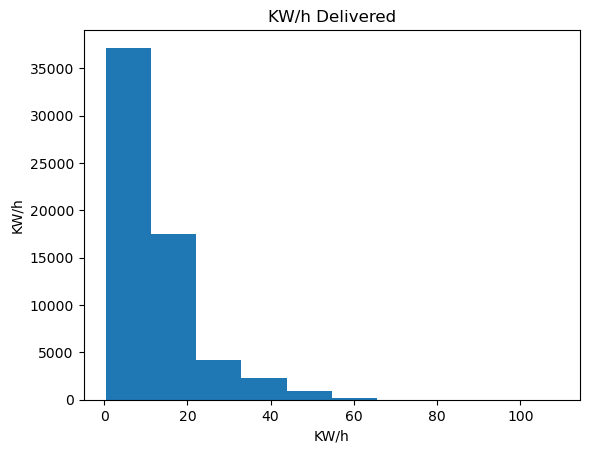

In [40]:
#Lets analyze the column "KWhDelivered":

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(cs_test2["kWhDelivered"])

plt.pyplot.xlabel("KW/h")
plt.pyplot.ylabel("KW/h")
plt.pyplot.title("KW/h Delivered")

In [41]:
bins = np.linspace(min(cs_test2["kWhDelivered"]), max(cs_test2["kWhDelivered"]), 4)
bins

array([  0.501     ,  36.59974722,  72.69849444, 108.79724167])

In [42]:
group_names = ["Low", "Mid", "Hi"]

In [43]:
cs_test2['kWhDelivered-binned'] = pd.cut(cs_test2["kWhDelivered"], bins, labels=group_names, include_lowest=True )
cs_test2[['kWhDelivered','kWhDelivered-binned']].head(20)

,kWhDelivered,kWhDelivered-binned
0,25.016,Low
1,33.097,Low
2,6.521,Low
3,2.355,Low
4,13.375,Low
5,13.370,Low
6,43.477,Mid
7,32.441,Low
8,13.264,Low
9,13.285,Low


In [44]:
cs_test2["kWhDelivered-binned"].value_counts()

kWhDelivered-binned
Low    59773
Mid     2586
Hi         3
Name: count, dtype: int64

Text(0.5, 1.0, 'KW/h Delivered')

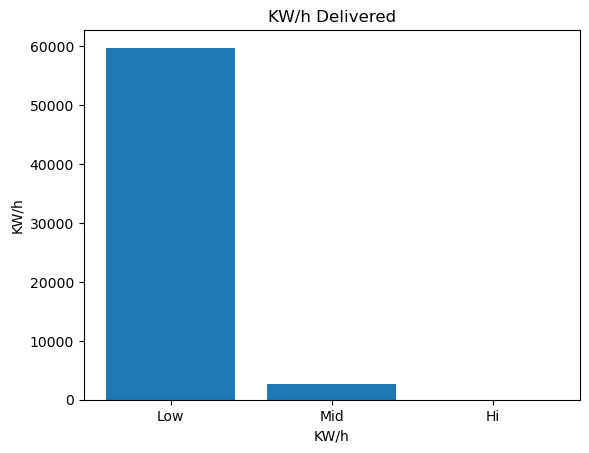

In [45]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, cs_test2["kWhDelivered-binned"].value_counts())

plt.pyplot.xlabel("KW/h")
plt.pyplot.ylabel("KW/h")
plt.pyplot.title("KW/h Delivered")

In [ ]:
# Normatization of the column "kWhDelivered".
# Here we are going to transform the values of this column so the variable values range from 0 to 1.

In [46]:
# replace (original value) by (original value)/(maximum value)
cs_test2['kWhDelivered-pct'] = cs_test2['kWhDelivered']/cs_test2['kWhDelivered'].max()

# Here we can see we've normalized "kWhDelivered"in the range of 0 to 1.


In [47]:
cs_test2.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,kWhDelivered-binned,kWhDelivered-pct
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 21:08:54,2020-01-02 11:11:15,2020-01-02 09:31:35,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Low,0.229932
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50,2020-01-02 14:38:21,2020-01-02 12:18:05,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,Low,0.304208
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35,2020-01-02 16:39:22,2020-01-02 08:35:06,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Low,0.059937
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58,2020-01-02 08:38:39,2020-01-02 07:18:45,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Low,0.021646
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01,2020-01-02 14:08:40,2020-01-02 10:17:30,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,Low,0.122935


In [48]:
#Whic data are we going to use...?

selected_columns = ["connectionTime", "disconnectTime", "doneChargingTime", "kWhDelivered", "private-site", "public-site", "kWhDelivered-binned", "kWhDelivered-pct"]
cs_test3 = cs_test2[selected_columns]
cs_test3.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,private-site,public-site,kWhDelivered-binned,kWhDelivered-pct
0,2020-01-02 21:08:54,2020-01-02 11:11:15,2020-01-02 09:31:35,25.016,True,False,Low,0.229932
1,2020-01-02 05:36:50,2020-01-02 14:38:21,2020-01-02 12:18:05,33.097,True,False,Low,0.304208
2,2020-01-02 05:56:35,2020-01-02 16:39:22,2020-01-02 08:35:06,6.521,True,False,Low,0.059937
3,2020-01-02 05:59:58,2020-01-02 08:38:39,2020-01-02 07:18:45,2.355,True,False,Low,0.021646
4,2020-01-02 06:00:01,2020-01-02 14:08:40,2020-01-02 10:17:30,13.375,True,False,Low,0.122935


In [49]:
cs_test3["connectionTime"] = pd.to_datetime(cs_test3["connectionTime"])
cs_test3["disconnectTime"] = pd.to_datetime(cs_test3["disconnectTime"])
cs_test3["doneChargingTime"] = pd.to_datetime(cs_test3["doneChargingTime"])

C:\Users\nikla\AppData\Local\Temp\ipykernel_28192\1777639520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_test3["connectionTime"] = pd.to_datetime(cs_test3["connectionTime"])
C:\Users\nikla\AppData\Local\Temp\ipykernel_28192\1777639520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_test3["disconnectTime"] = pd.to_datetime(cs_test3["disconnectTime"])
C:\Users\nikla\AppData\Local\Temp\ipykernel_28192\1777639520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [50]:
cs_test3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   connectionTime       62362 non-null  datetime64[ns, UTC]
 1   disconnectTime       62362 non-null  datetime64[ns, UTC]
 2   doneChargingTime     62362 non-null  datetime64[ns, UTC]
 3   kWhDelivered         62362 non-null  float64            
 4   private-site         62362 non-null  bool               
 5   public-site          62362 non-null  bool               
 6   kWhDelivered-binned  62362 non-null  category           
 7   kWhDelivered-pct     62362 non-null  float64            
dtypes: bool(2), category(1), datetime64[ns, UTC](3), float64(2)
memory usage: 5.0 MB


In [51]:
cs_test3.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,private-site,public-site,kWhDelivered-binned,kWhDelivered-pct
0,2020-01-02 21:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,True,False,Low,0.229932
1,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,True,False,Low,0.304208
2,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,True,False,Low,0.059937
3,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,True,False,Low,0.021646
4,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,True,False,Low,0.122935


In [54]:
# Extract the hour from the connectionTime column
cs_test3["connectionTime-hour"] = cs_test3["connectionTime"].dt.hour
cs_test3["doneChargingTime-hour"] = cs_test3["doneChargingTime"].dt.hour


C:\Users\nikla\AppData\Local\Temp\ipykernel_28192\3484839787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_test3["connectionTime-hour"] = cs_test3["connectionTime"].dt.hour
C:\Users\nikla\AppData\Local\Temp\ipykernel_28192\3484839787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_test3["doneChargingTime-hour"] = cs_test3["doneChargingTime"].dt.hour


In [55]:
# Group the data by hour and calculate the average kWh delivered
avg_kWh_per_hour = cs_test3.groupby("connectionTime-hour")["kWhDelivered"].mean()

print("Average kWh delivered per hour:")
print(avg_kWh_per_hour)


Average kWh delivered per hour:
connectionTime-hour
0     10.572253
1     12.582392
2      9.863258
3     14.341865
4     14.133523
5     13.992549
6     15.050403
7     12.968685
8     10.088586
9      9.767007
10    10.203472
11    10.179577
12     9.894781
13    10.696504
14    12.150141
15     8.534671
16     8.682071
17     8.891992
18     9.880828
19    10.410880
20    10.545941
21    10.964196
22    12.020410
23     9.702898
Name: kWhDelivered, dtype: float64


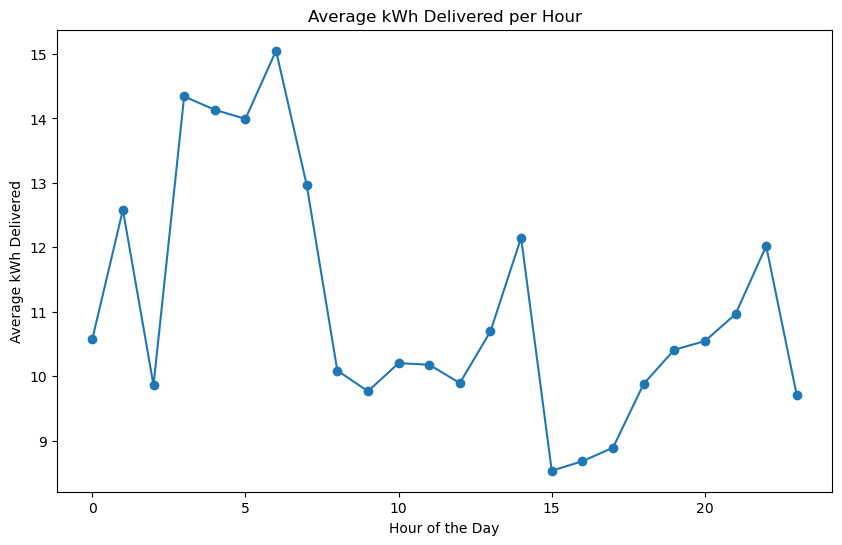

In [56]:
# Create a line chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(avg_kWh_per_hour.index, avg_kWh_per_hour.values, marker='o')
plt.title("Average kWh Delivered per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average kWh Delivered")
plt.show()


In [57]:
# Extract the day of the week from the connectionTime column
cs_test3["dayOfWeek"] = cs_test3["connectionTime"].dt.day_name()

# Calculate the average amount of kWh delivered for each day of the week
avg_kWh_per_day = cs_test3.groupby("dayOfWeek")["kWhDelivered"].mean()

C:\Users\nikla\AppData\Local\Temp\ipykernel_28192\2035051053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_test3["dayOfWeek"] = cs_test3["connectionTime"].dt.day_name()


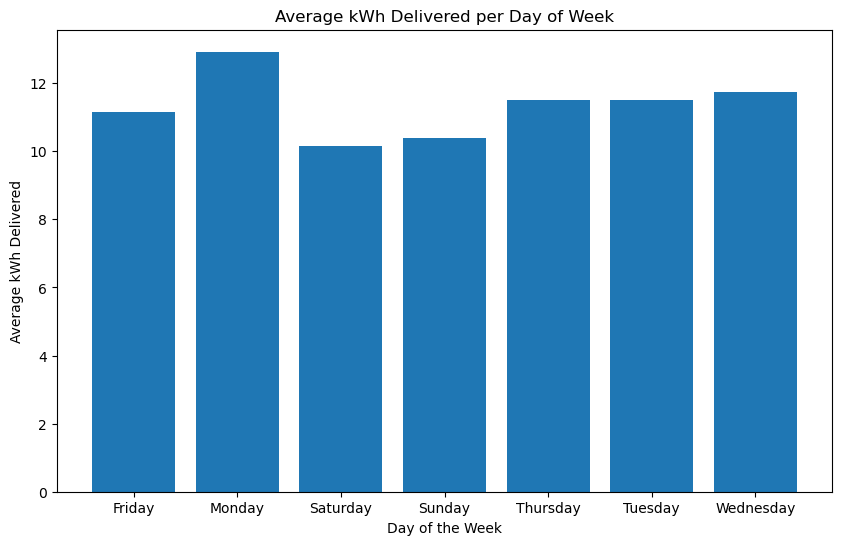

In [58]:
# Visualize the average amount of kWh delivered as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_kWh_per_day.index, avg_kWh_per_day.values)
plt.title("Average kWh Delivered per Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average kWh Delivered")
plt.show()


In [59]:
# Filter the data to only include private-site
df_filtered_private_site = cs_test3[cs_test3['private-site'] == True].index
df_filtered_public_site = cs_test3[cs_test3['private-site'] == False].index


private = cs_test3.drop(df_filtered_public_site)
public = cs_test3.drop(df_filtered_private_site)

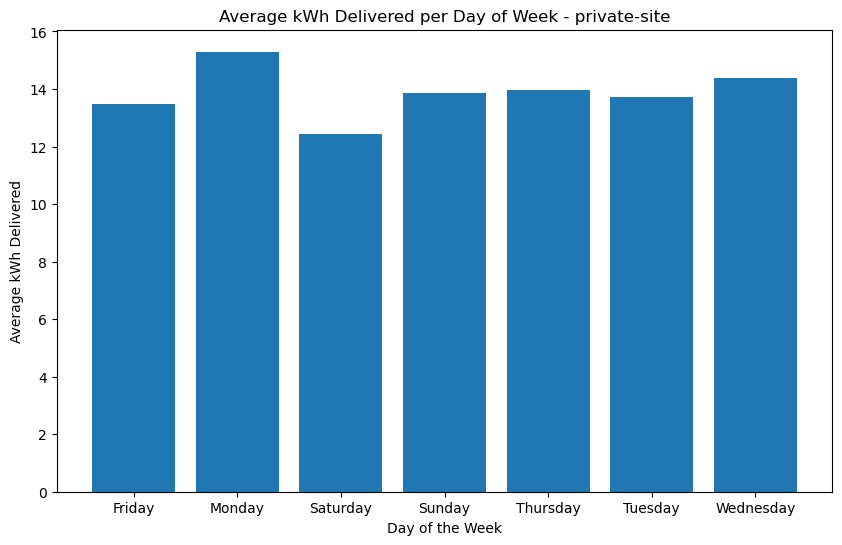

In [60]:
# Extract the day of the week from the connectionTime column
private["dayOfWeek"] = private["connectionTime"].dt.day_name()

# Calculate the average amount of kWh delivered for each day of the week
avg_kWh_per_day = private.groupby("dayOfWeek")["kWhDelivered"].mean()

# Visualize the average amount of kWh delivered as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_kWh_per_day.index, avg_kWh_per_day.values)
plt.title("Average kWh Delivered per Day of Week - private-site")
plt.xlabel("Day of the Week")
plt.ylabel("Average kWh Delivered")
plt.show()


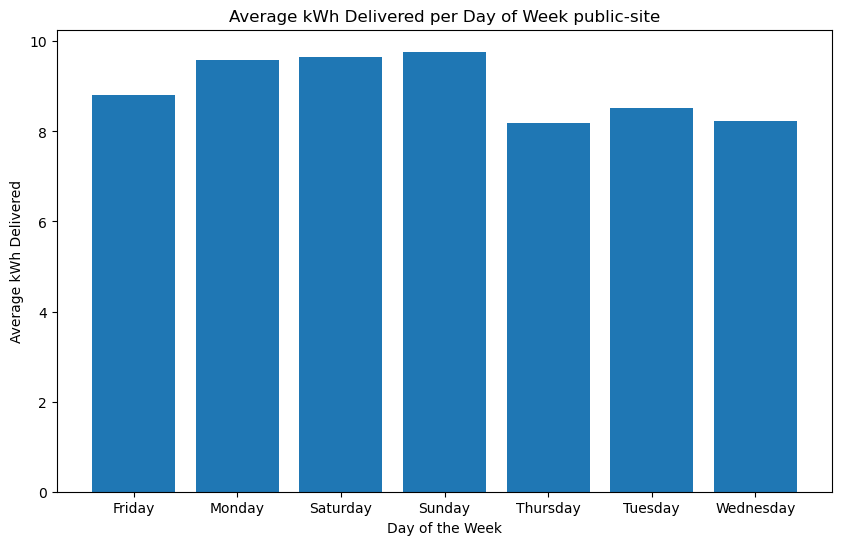

In [61]:
# Extract the day of the week from the connectionTime column
public["dayOfWeek"] = public["connectionTime"].dt.day_name()

# Calculate the average amount of kWh delivered for each day of the week
avg_kWh_per_day = public.groupby("dayOfWeek")["kWhDelivered"].mean()

# Visualize the average amount of kWh delivered as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_kWh_per_day.index, avg_kWh_per_day.values)
plt.title("Average kWh Delivered per Day of Week public-site")
plt.xlabel("Day of the Week")
plt.ylabel("Average kWh Delivered")
plt.show()

**Regarding 2(b):**

We can determine a few Key Performance Indicators to provide an overview of the charging site operations,
utilization and efficiency. 

One choice for a KPI are the opportunity costs that arise when EVSE is occupied by an already fully charged EV. 
We can call this KPI "unutilized occupation time". We can calculate the UOT by calculating the time difference
between our variables "doneChargingTime" and "disconnectTime".

In [65]:
# Let's demonstrate the UOT calculcation with a single data entry first:

cs_test4 = cs_test3
cs_test4.loc[0,"disconnectTime"] - cs_test4.loc[0,"doneChargingTime"]

Timedelta('0 days 01:39:40')

In [75]:
# Now, let's add a column to our cs_test4 dataframe that will contain our UOT for each data entry:

cs_test4["UOT"] = cs_test4["disconnectTime"] - cs_test4["doneChargingTime"]
cs_test4.head(20)

C:\Users\nikla\AppData\Local\Temp\ipykernel_28192\1689963976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_test4["UOT"] = cs_test4["disconnectTime"] - cs_test4["doneChargingTime"]


,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,private-site,public-site,kWhDelivered-binned,kWhDelivered-pct,connectionTime-hour,doneChargingTime-hour,dayOfWeek,UOT
0,2020-01-02 21:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,True,False,Low,0.229932,21,9,Thursday,0 days 01:39:40
1,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,True,False,Low,0.304208,5,12,Thursday,0 days 02:20:16
2,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,True,False,Low,0.059937,5,8,Thursday,0 days 08:04:16
3,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,True,False,Low,0.021646,5,7,Thursday,0 days 01:19:54
4,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,True,False,Low,0.122935,6,10,Thursday,0 days 03:51:10
5,2020-01-02 06:00:13+00:00,2020-01-02 15:00:41+00:00,2020-01-02 12:13:21+00:00,13.370,True,False,Low,0.122889,6,12,Thursday,0 days 02:47:20
6,2020-01-02 06:09:14+00:00,2020-01-02 17:57:58+00:00,2020-01-02 16:59:21+00:00,43.477,True,False,Mid,0.399615,6,16,Thursday,0 days 00:58:37
7,2020-01-02 06:17:32+00:00,2020-01-02 16:44:54+00:00,2020-01-02 12:22:40+00:00,32.441,True,False,Low,0.298179,6,12,Thursday,0 days 04:22:14
8,2020-01-02 06:25:38+00:00,2020-01-02 11:36:05+00:00,2020-01-02 10:38:39+00:00,13.264,True,False,Low,0.121915,6,10,Thursday,0 days 00:57:26
9,2020-01-02 06:27:40+00:00,2020-01-02 12:01:48+00:00,2020-01-02 11:17:46+00:00,13.285,True,False,Low,0.122108,6,11,Thursday,0 days 00:44:02


In [80]:
# We can now calculate the average UOT and group them hourly by the time an EV is done charging.

# Group the data by hour and calculate the average UOT
avg_UOT_per_hour = cs_test4.groupby("doneChargingTime-hour")["UOT"].mean()

print("Average UOT per hour (grouped by doneChargingTime):")
print(avg_UOT_per_hour)


Average UOT per hour (grouped by doneChargingTime):
doneChargingTime-hour
0    0 days 02:25:33.691680261
1       0 days 02:59:17.025000
2    0 days 02:44:00.358078602
3    0 days 04:14:35.537974683
4    0 days 01:53:32.026737967
5    0 days 02:55:48.597014925
6    0 days 03:56:57.467901234
7    0 days 05:16:36.444168734
8    0 days 05:12:53.537359550
9    0 days 04:56:56.629876132
10   0 days 04:08:14.064531548
11   0 days 03:28:44.660748146
12   0 days 02:57:41.534925732
13   0 days 02:22:33.072702943
14   0 days 01:44:20.669162995
15   0 days 01:18:40.178753830
16   0 days 01:06:52.950932684
17   0 days 01:16:48.855390904
18   0 days 01:20:38.667316692
19   0 days 01:37:58.192543411
20   0 days 01:55:39.826315789
21   0 days 02:40:45.069212410
22   0 days 02:49:57.695550351
23   0 days 02:33:30.982062780
Name: UOT, dtype: timedelta64[ns]


As another KPI, we can look at unutilized EVSE, meaning stations that are not connected to any EV. We can calculate the average time the EVSE goes unutilized. We can call this KPI "EVSE downtime".

In [91]:
# First, let's check check how many EVSE stations there are. To do this, we use the pandas unique function:

cs_test5 = cs_test2
len(cs_test5.stationID.unique())

106

In [93]:
cs_test5.stationID.unique()

array(['1-1-179-810', '1-1-193-825', '1-1-193-829', '1-1-193-820',
       '1-1-193-819', '1-1-194-821', '1-1-178-817', '1-1-191-804',
       '1-1-194-826', '1-1-178-823', '1-1-179-788', '1-1-194-818',
       '1-1-178-824', '1-1-194-822', '1-1-179-783', '1-1-193-816',
       '1-1-179-798', '1-1-178-828', '1-1-179-787', '1-1-191-792',
       '1-1-193-827', '1-1-179-777', '1-1-179-799', '1-1-179-796',
       '1-1-179-815', '1-1-179-797', '1-1-179-781', '1-1-179-800',
       '1-1-179-809', '1-1-179-791', '1-1-179-794', '1-1-179-779',
       '1-1-179-801', '1-1-179-790', '1-1-191-802', '1-1-191-789',
       '1-1-191-806', '1-1-191-785', '1-1-191-808', '1-1-191-782',
       '1-1-179-813', '1-1-191-795', '1-1-191-807', '1-1-191-812',
       '1-1-191-803', '1-1-191-778', '1-1-191-811', '1-1-191-780',
       '1-1-191-786', '1-1-191-793', '1-1-191-784', '1-1-191-805',
       '2-39-138-566', '2-39-79-379', '2-39-79-378', '2-39-139-28',
       '2-39-79-377', '2-39-125-21', '2-39-127-19', '2-39-79-

In [144]:
# Using the following line of code, we can look at all data entries for our first EVSE station:

cs_test5_station0 = cs_test5[cs_test5["stationID"]==cs_test5.stationID.unique()[0]]
cs_test5_station0

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,kWhDelivered-binned,kWhDelivered-pct
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 21:08:54,2020-01-02 11:11:15,2020-01-02 09:31:35,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Low,0.229932
51,51,5e23b149f9af8b5fe4b97402,2020-01-02 11:30:53,2020-01-02 15:18:39,2020-01-02 15:19:36,4.405,1_1_179_810_2020-01-02 19:30:53.010234,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 10.0, 'mil...",True,False,Low,0.040488
94,94,5e28f766f9af8b70ebc91ca5,2020-01-06 06:09:16,2020-01-06 16:46:48,2020-01-06 09:52:07,19.373,1_1_179_810_2020-01-06 14:09:15.840471,AG-3F30,1-1-179-810,America/Los_Angeles,416.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil...",True,False,Low,0.178065
160,160,5e2a48e8f9af8b75aed8e92d,2020-01-07 05:33:35,2020-01-07 16:15:36,2020-01-07 07:15:36,9.888,1_1_179_810_2020-01-07 13:33:35.102196,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 15.0, 'mil...",True,False,Low,0.090885
229,229,5e2a48e8f9af8b75aed8e972,2020-01-07 16:34:18,2020-01-07 19:07:00,2020-01-07 18:37:44,10.509,1_1_179_810_2020-01-08 00:34:18.412189,AG-3F30,1-1-179-810,America/Los_Angeles,1805.0,"[{'WhPerMile': 350, 'kWhRequested': 10.5, 'mil...",True,False,Low,0.096593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66203,9841,5d50b34ff9af8b34f280b3c5,2019-07-26 14:28:19+00:00,2019-07-26 23:31:13+00:00,2019-07-26 19:30:23+00:00,30.016,1_1_179_810_2019-07-26 14:28:19.113775,AG-3F30,1-1-179-810,America/Los_Angeles,537.0,"[{'WhPerMile': 250, 'kWhRequested': 30.0, 'mil...",True,False,Low,0.275889
66266,9904,5d54a7cff9af8b413ec70551,2019-07-29 13:35:57+00:00,2019-07-29 23:36:11+00:00,2019-07-29 18:15:21+00:00,17.249,1_1_179_810_2019-07-29 13:35:56.947933,AG-3F30,1-1-179-810,America/Los_Angeles,416.0,"[{'WhPerMile': 300, 'kWhRequested': 21.0, 'mil...",True,False,Low,0.158543
66345,9983,5d55f950f9af8b45dfb3d88e,2019-07-30 13:58:53+00:00,2019-07-30 23:21:28+00:00,2019-07-30 22:12:50+00:00,44.658,1_1_179_810_2019-07-30 13:58:53.090932,AG-3F30,1-1-179-810,America/Los_Angeles,1283.0,"[{'WhPerMile': 350, 'kWhRequested': 52.5, 'mil...",True,False,Mid,0.410470
66407,10045,5d574ad2f9af8b4c10c0362c,2019-07-31 13:40:20+00:00,2019-07-31 18:19:40+00:00,2019-07-31 17:47:25+00:00,9.494,1_1_179_810_2019-07-31 13:40:19.965340,AG-3F30,1-1-179-810,America/Los_Angeles,416.0,"[{'WhPerMile': 300, 'kWhRequested': 18.0, 'mil...",True,False,Low,0.087263


In [161]:
# We can also look at only the first row of this dataframe:

cs_test5_station0[0:1]

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,kWhDelivered-binned,kWhDelivered-pct
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 21:08:54,2020-01-02 11:11:15,2020-01-02 09:31:35,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Low,0.229932


In [162]:
cs_test5_station0.loc[0,"disconnectTime"]

datetime.datetime(2020, 1, 2, 11, 11, 15)

In [165]:
# Problems arise when we try to select the second row, as it has the index 51 instead of 1. 
# Upon trying to select the row with index 1, we get an error message:

cs_test5_station0.loc[1,"connectionTime"]

KeyError: 1

In [166]:
cs_test5_station0.loc[51,"connectionTime"]

datetime.datetime(2020, 1, 2, 11, 30, 53)

In [260]:
# first attempt to add new, temporary IDs to avoid this problem - not really working as intended

cs_test5_station0['tempID'] = 0

for i in range(len(cs_test5_station0)):
       cs_test5_station0.loc[i,'tempID'] = i
        
cs_test5_station0.head(5)

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,kWhDelivered-binned,kWhDelivered-pct,tempID,downtime
1,0.0,5e23b149f9af8b5fe4b973cf,2020-01-02 21:08:54,2020-01-02 11:11:15,2020-01-02 09:31:35,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Low,0.229932,1.0,0 days 00:00:00
2,51.0,5e23b149f9af8b5fe4b97402,2020-01-02 11:30:53,2020-01-02 15:18:39,2020-01-02 15:19:36,4.405,1_1_179_810_2020-01-02 19:30:53.010234,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 10.0, 'mil...",True,False,Low,0.040488,2.0,0 days 00:19:38
3,94.0,5e28f766f9af8b70ebc91ca5,2020-01-06 06:09:16,2020-01-06 16:46:48,2020-01-06 09:52:07,19.373,1_1_179_810_2020-01-06 14:09:15.840471,AG-3F30,1-1-179-810,America/Los_Angeles,416.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil...",True,False,Low,0.178065,3.0,3 days 14:50:37
4,160.0,5e2a48e8f9af8b75aed8e92d,2020-01-07 05:33:35,2020-01-07 16:15:36,2020-01-07 07:15:36,9.888,1_1_179_810_2020-01-07 13:33:35.102196,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 15.0, 'mil...",True,False,Low,0.090885,4.0,0 days 12:46:47
5,229.0,5e2a48e8f9af8b75aed8e972,2020-01-07 16:34:18,2020-01-07 19:07:00,2020-01-07 18:37:44,10.509,1_1_179_810_2020-01-08 00:34:18.412189,AG-3F30,1-1-179-810,America/Los_Angeles,1805.0,"[{'WhPerMile': 350, 'kWhRequested': 10.5, 'mil...",True,False,Low,0.096593,5.0,0 days 00:18:42


In [233]:
# first attempt to calculate downtime for station 0 using new column

downtime = datetime(2024,1,1,12,30,30) # random values since 0 0 0 0 0 0 wont be accepted
cs_test5_station0['downtime'] = downtime - downtime # set initial downtime to 0

# this is how we calculate the downtime for 1 row, but when I try to put it in a for-loop, it does not work anymore:    
cs_test5_station0.loc[51,'downtime'] = cs_test5_station0.loc[51,'connectionTime'] - cs_test5_station0.loc[0,'disconnectTime']    

for i in range(len(cs_test5_station0)):
    cs_test5_station0.loc[i+1,'downtime'] = cs_test5_station0.loc[i+1,'connectionTime'] - cs_test5_station0.loc[i,'disconnectTime']  

cs_test5_station0.head(5)

TypeError: unsupported operand type(s) for -: 'float' and 'datetime.datetime'

In [244]:
# second attempt to calculate downtime for station 0

totaldowntime = datetime(2024,1,1,12,30,30) # random values since 0 0 0 0 0 0 wont be accepted
totaldowntime = totaldowntime - totaldowntime # set initial downtime to 0

for i in range(len(cs_test5_station0)):
    totaldowntime = totaldowntime + cs_test5_station0.loc[i+1,'connectionTime'] - cs_test5_station0.loc[i,'disconnectTime']
    
totaldowntime

# for some reason, according to the error log, one of the variables is a float - even though
# they are all datetime objects. This only happens in the for-loop.
# In the next cell I tried the same operation, outside a loop, and it works just fine.
# I am guessing it is because of the index not going up in increments of 1, but I am not sure


TypeError: unsupported operand type(s) for +: 'datetime.timedelta' and 'float'

In [243]:
totaldowntime = totaldowntime + cs_test5_station0.loc[51,'connectionTime'] - cs_test5_station0.loc[0,'disconnectTime']
totaldowntime

datetime.timedelta(seconds=1178)

In [261]:
# found out how to fix the index problem

cs_test5_station0.index = range(1,len(cs_test5_station0)+1)
cs_test5_station0


,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,kWhDelivered-binned,kWhDelivered-pct,tempID,downtime
1,0.0,5e23b149f9af8b5fe4b973cf,2020-01-02 21:08:54,2020-01-02 11:11:15,2020-01-02 09:31:35,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Low,0.229932,1.0,0 days 00:00:00
2,51.0,5e23b149f9af8b5fe4b97402,2020-01-02 11:30:53,2020-01-02 15:18:39,2020-01-02 15:19:36,4.405,1_1_179_810_2020-01-02 19:30:53.010234,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 10.0, 'mil...",True,False,Low,0.040488,2.0,0 days 00:19:38
3,94.0,5e28f766f9af8b70ebc91ca5,2020-01-06 06:09:16,2020-01-06 16:46:48,2020-01-06 09:52:07,19.373,1_1_179_810_2020-01-06 14:09:15.840471,AG-3F30,1-1-179-810,America/Los_Angeles,416.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil...",True,False,Low,0.178065,3.0,3 days 14:50:37
4,160.0,5e2a48e8f9af8b75aed8e92d,2020-01-07 05:33:35,2020-01-07 16:15:36,2020-01-07 07:15:36,9.888,1_1_179_810_2020-01-07 13:33:35.102196,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 15.0, 'mil...",True,False,Low,0.090885,4.0,0 days 12:46:47
5,229.0,5e2a48e8f9af8b75aed8e972,2020-01-07 16:34:18,2020-01-07 19:07:00,2020-01-07 18:37:44,10.509,1_1_179_810_2020-01-08 00:34:18.412189,AG-3F30,1-1-179-810,America/Los_Angeles,1805.0,"[{'WhPerMile': 350, 'kWhRequested': 10.5, 'mil...",True,False,Low,0.096593,5.0,0 days 00:18:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3388.0,0 days 00:00:00
3389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3389.0,0 days 00:00:00
3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3390.0,0 days 00:00:00
3391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0 days 00:00:00


In [263]:
# dropping missing values

cs_test5_station0.dropna(axis=0, inplace=False)

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,kWhDelivered-binned,kWhDelivered-pct,tempID,downtime
1,0.0,5e23b149f9af8b5fe4b973cf,2020-01-02 21:08:54,2020-01-02 11:11:15,2020-01-02 09:31:35,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Low,0.229932,1.0,0 days 00:00:00
2,51.0,5e23b149f9af8b5fe4b97402,2020-01-02 11:30:53,2020-01-02 15:18:39,2020-01-02 15:19:36,4.405,1_1_179_810_2020-01-02 19:30:53.010234,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 10.0, 'mil...",True,False,Low,0.040488,2.0,0 days 00:19:38
3,94.0,5e28f766f9af8b70ebc91ca5,2020-01-06 06:09:16,2020-01-06 16:46:48,2020-01-06 09:52:07,19.373,1_1_179_810_2020-01-06 14:09:15.840471,AG-3F30,1-1-179-810,America/Los_Angeles,416.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil...",True,False,Low,0.178065,3.0,3 days 14:50:37
4,160.0,5e2a48e8f9af8b75aed8e92d,2020-01-07 05:33:35,2020-01-07 16:15:36,2020-01-07 07:15:36,9.888,1_1_179_810_2020-01-07 13:33:35.102196,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 15.0, 'mil...",True,False,Low,0.090885,4.0,0 days 12:46:47
5,229.0,5e2a48e8f9af8b75aed8e972,2020-01-07 16:34:18,2020-01-07 19:07:00,2020-01-07 18:37:44,10.509,1_1_179_810_2020-01-08 00:34:18.412189,AG-3F30,1-1-179-810,America/Los_Angeles,1805.0,"[{'WhPerMile': 350, 'kWhRequested': 10.5, 'mil...",True,False,Low,0.096593,5.0,0 days 00:18:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,9841.0,5d50b34ff9af8b34f280b3c5,2019-07-26 14:28:19+00:00,2019-07-26 23:31:13+00:00,2019-07-26 19:30:23+00:00,30.016,1_1_179_810_2019-07-26 14:28:19.113775,AG-3F30,1-1-179-810,America/Los_Angeles,537.0,"[{'WhPerMile': 250, 'kWhRequested': 30.0, 'mil...",True,False,Low,0.275889,590.0,0 days 00:00:00
591,9904.0,5d54a7cff9af8b413ec70551,2019-07-29 13:35:57+00:00,2019-07-29 23:36:11+00:00,2019-07-29 18:15:21+00:00,17.249,1_1_179_810_2019-07-29 13:35:56.947933,AG-3F30,1-1-179-810,America/Los_Angeles,416.0,"[{'WhPerMile': 300, 'kWhRequested': 21.0, 'mil...",True,False,Low,0.158543,591.0,0 days 00:00:00
592,9983.0,5d55f950f9af8b45dfb3d88e,2019-07-30 13:58:53+00:00,2019-07-30 23:21:28+00:00,2019-07-30 22:12:50+00:00,44.658,1_1_179_810_2019-07-30 13:58:53.090932,AG-3F30,1-1-179-810,America/Los_Angeles,1283.0,"[{'WhPerMile': 350, 'kWhRequested': 52.5, 'mil...",True,False,Mid,0.410470,592.0,0 days 00:00:00
593,10045.0,5d574ad2f9af8b4c10c0362c,2019-07-31 13:40:20+00:00,2019-07-31 18:19:40+00:00,2019-07-31 17:47:25+00:00,9.494,1_1_179_810_2019-07-31 13:40:19.965340,AG-3F30,1-1-179-810,America/Los_Angeles,416.0,"[{'WhPerMile': 300, 'kWhRequested': 18.0, 'mil...",True,False,Low,0.087263,593.0,0 days 00:00:00


In [264]:
# third attempt to calculate downtime for station 0 using new column

downtime = datetime(2024,1,1,12,30,30) # random values since 0 0 0 0 0 0 wont be accepted
cs_test5_station0['downtime'] = downtime - downtime # set initial downtime to 0

for i in range(1,len(cs_test5_station0)):
    cs_test5_station0.loc[i+1,'downtime'] = cs_test5_station0.loc[i+1,'connectionTime'] - cs_test5_station0.loc[i,'disconnectTime']  

cs_test5_station0.head(5)

# the index problem is solved, however, the loop is still not working correctly.
# this time, one variable is detected as str. really dont know whats going on here

TypeError: unsupported operand type(s) for -: 'str' and 'datetime.datetime'

In [271]:
# fourth attempt to calculate downtime for station 0

totaldowntime = datetime(2024,1,1,12,30,30) # random values since 0 0 0 0 0 0 wont be accepted
totaldowntime = totaldowntime - totaldowntime # set initial downtime to 0

for i in range(1,len(cs_test5_station0)):
    totaldowntime = totaldowntime + datetime(cs_test5_station0.loc[i+1,'connectionTime']) - datetime(cs_test5_station0.loc[i,'disconnectTime'])
    
totaldowntime

# forcing datetime objects also does not work

TypeError: 'datetime.datetime' object cannot be interpreted as an integer